# import libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [37]:
df=pd.read_csv("raw_merged_heart_dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
2176,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
2177,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
2178,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
2179,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0
2180,53,1,0,110,335,0,1,143,1,3.0,1,1,3,0


# duplicate and missing values handling

In [39]:
df.duplicated().sum()

np.int64(1287)

In [40]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
df.dropna(inplace=True)

In [42]:
df.shape

(2181, 14)

In [43]:
df["target"].unique()

array([1, 0])

In [44]:
df["target"].value_counts()

target
0    1099
1    1082
Name: count, dtype: int64

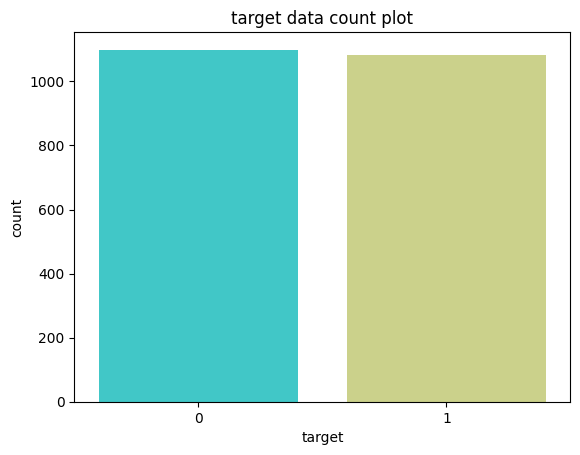

In [45]:
sns.countplot(x="target",data=df,palette="rainbow")
plt.title("target data count plot")
plt.show()

<Axes: >

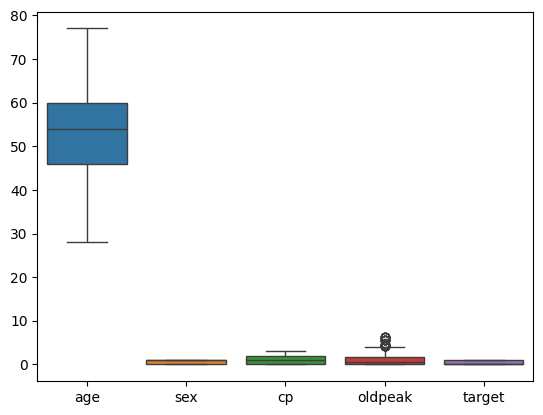

In [46]:
sns.boxplot(df)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB


# data preprocessing ->label encoding,

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()
df["trestbps"]=le.fit_transform(df["trestbps"])
df["chol"]=le.fit_transform(df["chol"])
df["fbs"]=le.fit_transform(df["fbs"])
df['restecg']=le.fit_transform(df["restecg"])
df['thalachh']=le.fit_transform(df["thalachh"])
df["exang"]=le.fit_transform(df["exang"])
df["slope"]=le.fit_transform(df["slope"])
df["ca"]=le.fit_transform(df["ca"])
df["thal"]=le.fit_transform(df["thal"])
df["oldpeak"]=le.fit_transform(df["oldpeak"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       2181 non-null   int64
 1   sex       2181 non-null   int64
 2   cp        2181 non-null   int64
 3   trestbps  2181 non-null   int64
 4   chol      2181 non-null   int64
 5   fbs       2181 non-null   int64
 6   restecg   2181 non-null   int64
 7   thalachh  2181 non-null   int64
 8   exang     2181 non-null   int64
 9   oldpeak   2181 non-null   int64
 10  slope     2181 non-null   int64
 11  ca        2181 non-null   int64
 12  thal      2181 non-null   int64
 13  target    2181 non-null   int64
dtypes: int64(14)
memory usage: 238.7 KB


# split target and features

In [50]:
x=df.drop("target",axis=1)
y=df["target"]

In [51]:
x.shape,y.shape

((2181, 13), (2181,))

# feature scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# train test split 

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [56]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1744, 13), (437, 13), (1744,), (437,))

# model train : random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

# accuracy checking

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
accuracy_score(y_pred_rf,y_test)

0.9565217391304348

In [62]:
cm=confusion_matrix(y_pred_rf,y_test)
cm

array([[208,  10],
       [  9, 210]])

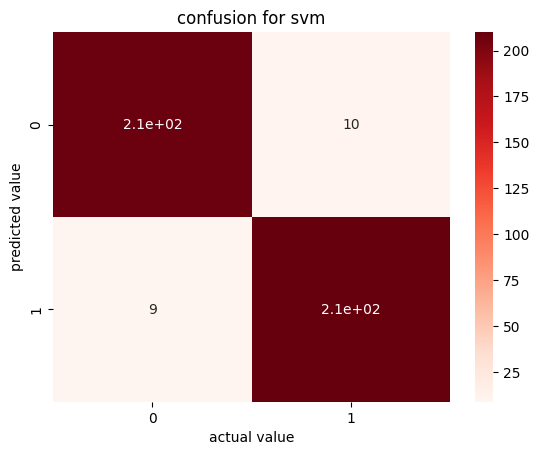

In [63]:
sns.heatmap(cm,annot=True,cmap="Reds")
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.title("confusion for svm")
plt.show()

# final check 

In [64]:
from sklearn.metrics import balanced_accuracy_score

In [65]:
balanced_accuracy_score(y_test,y_pred_rf)

0.9565354000837871

# final report

In [66]:
from sklearn.metrics import classification_report

In [67]:
classification_report(y_test,y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96       217\n           1       0.96      0.95      0.96       220\n\n    accuracy                           0.96       437\n   macro avg       0.96      0.96      0.96       437\nweighted avg       0.96      0.96      0.96       437\n'

# save as pickle file

In [33]:
import pickle

In [34]:
pickle.dump(rf,open('final_model.pkl','wb'))
print("project saved successfully as a pickle file")

project saved successfully as a pickle file


# load pickle file

In [68]:
pickled_model=pickle.load(open('final_model.pkl','rb'))